In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, NMF, MiniBatchSparsePCA, TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [2]:
df = pd.read_pickle('FT-data-DSpace/data_agreggated.pickle')
df = df[['Date', 'Meeting Number', 'Clean']]

In [3]:
df['Sentences'] = df['Clean'].apply(lambda x: ' '.join(x))
df['Date'] = pd.to_datetime(df['Date'])
df.sample(2)

,Date,Meeting Number,Clean,Sentences
469,2013-12-17 13:00:00,34. møde,"[mød, åbn, dag, følg, anmeld, minist, sund, fo...",mød åbn dag følg anmeld minist sund forebyg as...
752,2016-05-31 13:00:00,104. møde,"[mød, åbn, dag, følg, anmeld, udlænding, integ...",mød åbn dag følg anmeld udlænding integration ...


In [4]:
#tvec = TfidfVectorizer(min_df=.01, max_df=1.0, sublinear_tf=True, analyzer='word', ngram_range=(1,2), max_features=20000)
tvec = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=10000)
x = tvec.fit_transform(df['Sentences'])

words = tvec.get_feature_names()

In [5]:
df_x = pd.DataFrame(columns= words, data=x.toarray())
df_x['Date'] = df['Date']
df_x['Year'] = df_x['Date'].dt.year
df_x['Meeting'] = df['Meeting Number']
df_x.sample(2)

,3f,aaen,aalborg,aarhus,aastrup,aastrup jens,abildgaard,absolut,absolut ikk,absurd,...,østeuropæisk,østr,øvels,øverst,øvr,øvr ikk,øvr parti,Date,Year,Meeting
193,0.000000,0.008513,0.0000,0.007678,0.0,0.0,0.0,0.001987,0.0,0.0,...,0.010728,0.0,0.001484,0.0,0.005002,0.000000,0.00175,2011-04-29 10:00:00,2011,85. møde
157,0.001875,0.057825,0.0028,0.002745,0.0,0.0,0.0,0.002664,0.0,0.0,...,0.000000,0.0,0.001326,0.0,0.015647,0.001252,0.00000,2011-02-02 13:00:00,2011,49. møde


### PCA

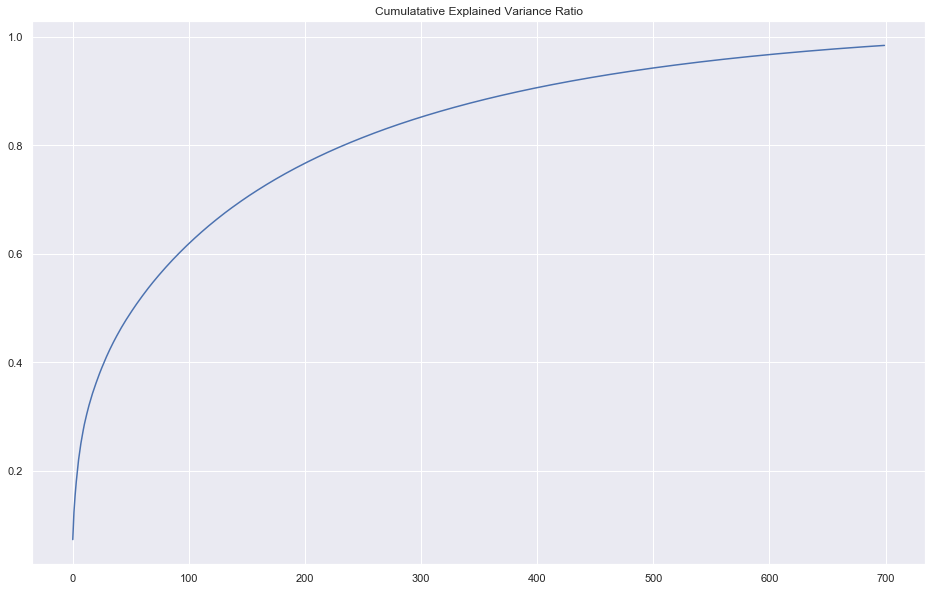

In [6]:
pca = TruncatedSVD(n_components=700, n_iter=10) ## latent semantic analysis (LSA)
pca_result = pca.fit_transform(df_x[words].values)
df_x['pca-one'] = pca_result[:,0]
df_x['pca-two'] = pca_result[:,1] 
df_x['pca-three'] = pca_result[:,2]#
plt.figure(figsize=(16,10))
plt.title('Cumulatative Explained Variance Ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [ ]:
### you can skip the elbow method

In [ ]:
#Code For Elbow Method
nc = range(1,60)
kmeans = [KMeans(n_clusters = i, n_init = 100, max_iter = 300, precompute_distances = 'auto' ) for i in nc]
score = [kmeans[i].fit(pca_result).inertia_ for i in range(len(kmeans))]
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show() ## to find the most optimal K -> optimal K is when the graph levels off


In [12]:
k = 3
#kmeans = KMeans(n_clusters=3).fit(df_x[words])
kmeans = KMeans(n_clusters=3).fit(pca_result)
df_x['label'] = kmeans.labels_

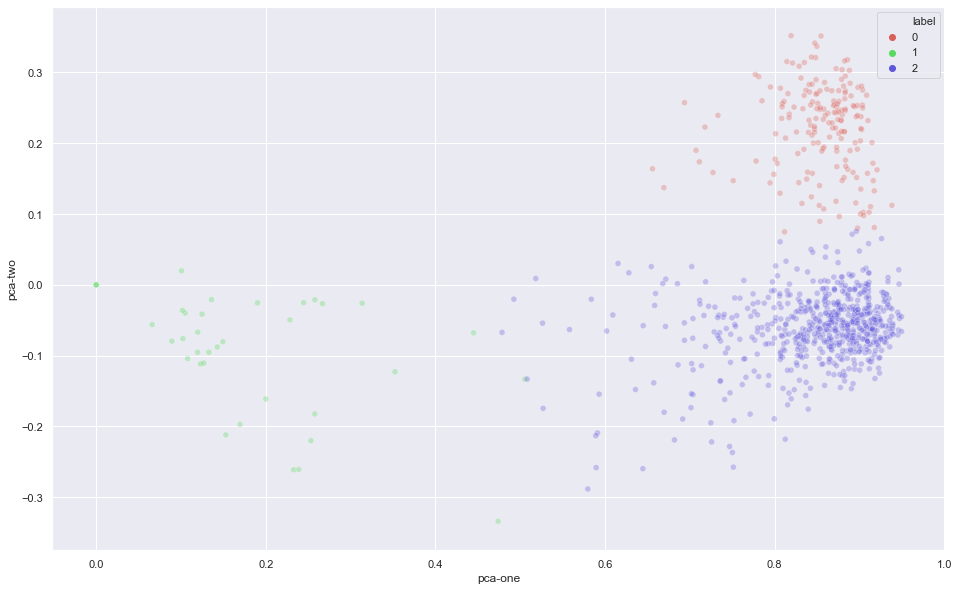

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='label',
    palette=sns.color_palette("hls", k),
    data=df_x,
    legend="full",
    alpha=0.3
)

#### T-SNE

In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=500)
#tsne_results = tsne.fit_transform(df_x[words])
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 863 samples in 0.110s...
[t-SNE] Computed neighbors for 863 samples in 0.778s...
[t-SNE] Computed conditional probabilities for sample 863 / 863
[t-SNE] Mean sigma: 0.163061
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.419083
[t-SNE] KL divergence after 500 iterations: 1.543930
t-SNE done! Time elapsed: 3.993523120880127 seconds


In [15]:
df_x['tsne_component_one'] = tsne_results[:,0]
df_x['tsne_component_two'] = tsne_results[:,1]

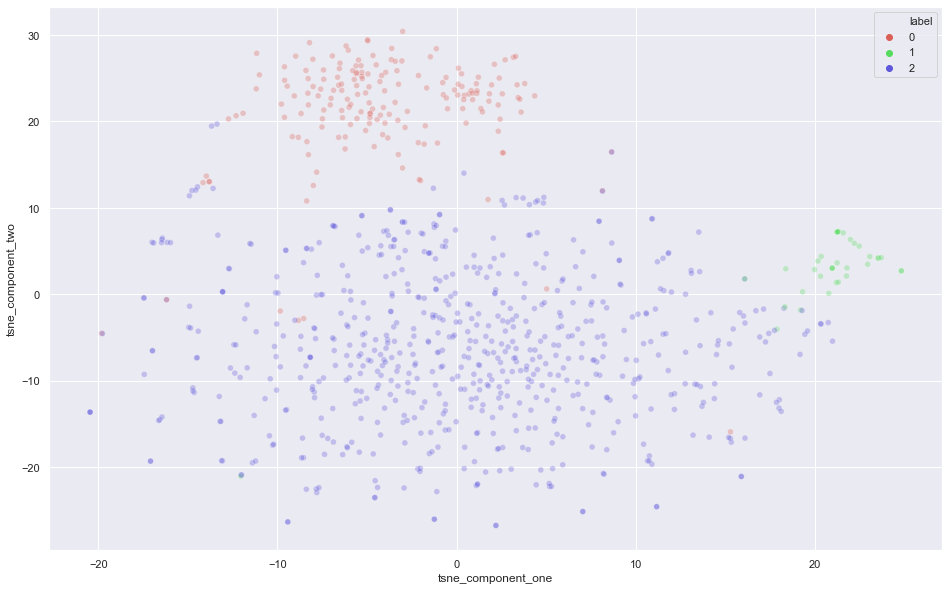

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_component_one", y="tsne_component_two",
    hue='label',
    palette=sns.color_palette("hls", k),
    data=df_x,
    legend="full",
    alpha=0.3
)